In [162]:
import pandas as pd
import re
import numpy as np

In [293]:
import datetime
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.utils import resample


In [28]:
import nltk
from nltk.corpus import stopwords


In [131]:
import matplotlib.pyplot as plt


In [29]:
from flair.models import TextClassifier
from flair.data import Sentence

# Data Preprocessing

In [87]:
rest_data=pd.read_csv("restaurant_dataset_updated.csv")

In [41]:
rv_text = rest_data['review_text']

In [372]:
ctn_rest_data = C

In [375]:
rest_data.loc[rest_data['State'] == 'CA',:]

,Unnamed: 0,ReviewId,Business ID,user_id,useful,stars,date,review_text,user_review_counts,yelping_since,average_stars,Name,City,State,Postal_code,business_stars,biz_review_counts


In [51]:
def get_specific_date(date):
    match = re.search(r'2020-0[12345]-\d{2}',date)
    if match:
        return True
    else:
        return False
    

In [89]:
texas_rest_data=texas_rest_data.loc[texas_rest_data['date'].apply(get_specific_date),:]

In [90]:
texas_rest_data_copy = texas_rest_data.copy()

In [91]:
texas_rest_data_copy

,Unnamed: 0,ReviewId,Business ID,user_id,useful,stars,date,review_text,user_review_counts,yelping_since,average_stars,Name,City,State,Postal_code,business_stars,biz_review_counts
1,589522,FaOPA8Wg7IL9P9cRPVfg2A,_HjtaT4TMHwOoGG_pZmk1A,IjkcZH5qcb17yn4fCc8pvg,0,5.0,2020-01-02,Torchy's got nothing on this place. First time...,8.0,2013-11-03 21:26:36,5.00,Macho Taco,Austin,TX,78748,4.5,222.0
3,589549,cZoQ8fzRaBD3EbICD9osWg,-dNzrtdgR9v5kbqxw0ZKoA,wSaW5syvPtC2yGF0GaGlCw,0,5.0,2020-01-13,"Love this place! Fantastic service, excellent ...",38.0,2009-12-26 20:36:41,2.98,Gabriela's Downtown,Austin,TX,78702,4.0,490.0
5,589559,bq8qFAEGob28bl9bNtHoRg,KEh3efWSOIzd8BvuW-X4-g,0szBybqEcVuvscXFJObs_w,4,5.0,2020-01-02,"The 04, that's all you need to know. Supper fi...",337.0,2011-08-21 00:38:15,4.06,Phoebe's Diner,Austin,TX,78704,4.5,997.0
12,589623,fSN6rrpBSdjfXCkQkU4kkQ,gvpoFnaCq2J7TBXV7yFIkQ,n4Oe41MW3j59PEmrG3HYXw,0,5.0,2020-02-25,I love this place!\nVery tasty tacos...\nClean...,150.0,2017-12-19 01:42:07,4.01,Velvet Taco Domain,Austin,TX,78758,4.0,667.0
21,589688,XECyroQQXllm9JBAFW8vTg,NTM21on42zdaabHWUSnZ1w,VAWZZoJLhRrl5jxH4t9m_Q,1,2.0,2020-01-11,My boyfriend and I came here off a whim after ...,152.0,2014-06-02 20:36:20,3.75,Hideaway Kitchen & Bar,Austin,TX,78744,4.0,376.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276934,8634831,h7bK41J-srxtuuVHKJKDHg,RvJzNNcQNimyeBmmOLSSJQ,1O638BDK_fWuxgTVJwff-A,5,2.0,2020-04-26,The taste of this food simply cannot make up b...,2870.0,2008-01-02 05:38:23,3.83,Madras Dhaba,Austin,TX,78702,4.5,105.0
276956,8634919,x2RN8F12NMiU6TOqPsSJqw,WFp2lPcG2JIV8o-r2ilahQ,LaC7BFs_N5UbdxQjjvOjLg,33,2.0,2020-03-02,"Honestly, I was really bummed. We came here a...",267.0,2014-06-28 15:30:22,4.13,Taqueria Las Chivas Jalisco,Austin,TX,78753,3.5,38.0
276984,8635062,u92pbk9V7t46b60bmUZmJA,la7Zg-LRYE9TPb791akEOg,0PrV9wgHBnDwb71F-ZhMag,1,5.0,2020-02-02,First thing you notice walking in is the cool ...,114.0,2012-08-17 19:44:53,4.47,Happy Chicks,Austin,TX,78757,4.0,56.0
276999,8635155,HFGKQPcVnm45pH616sS9BQ,O1pWzMvVmBomQUaZ3aUlLw,PKFgiJOXEZfoAhMLYXUqCg,3,2.0,2020-02-24,"Okay, okay. I decided to give Snooze another c...",248.0,2011-04-04 02:30:07,3.88,"Snooze, an A.M. Eatery E. Austin",Austin,TX,78702,4.0,103.0


In [32]:
def get_filter_tokens(txt_data):
    filter_tokens_list = []
    for n in txt_data:
        words = nltk.word_tokenize(n.lower())
        filter_tokens = [w for w in words if (w not in stopwords.words('english')) and (w.isalpha())]
        filter_tokens_list.append(filter_tokens)
    return filter_tokens_list
        
    

In [57]:
filter_token = get_filter_tokens(texas_rest_data['review_text'])

In [58]:
filter_token

[['torchy',
  'got',
  'nothing',
  'place',
  'first',
  'time',
  'ever',
  'eating',
  'amazing',
  'agua',
  'frescas',
  'good',
  'serve',
  'breakfast',
  'day',
  'staff',
  'inviting',
  'nice',
  'atmosphere',
  'great',
  'clean',
  'definitely',
  'back'],
 ['love',
  'place',
  'fantastic',
  'service',
  'excellent',
  'food',
  'perfect',
  'cocktails',
  'stopped',
  'whim',
  'could',
  'happier',
  'back',
  'happy',
  'hour'],
 ['need',
  'know',
  'supper',
  'filling',
  'super',
  'delish',
  'damn',
  'brunch',
  'plate',
  'puts',
  'brunch',
  'plates',
  'shame',
  'different',
  'kinds',
  'protein',
  'smoked',
  'brisket',
  'smoked',
  'sausage',
  'smoked',
  'ham',
  'like',
  'pork',
  'chop',
  'hash',
  'brown',
  'casserole',
  'two',
  'eggs',
  'toast',
  'nothing',
  'quite',
  'like',
  'least',
  'meat',
  'loving',
  'texan',
  'pro',
  'tip',
  'get',
  'mimosas',
  'even',
  'matter',
  'flavor',
  'take',
  'pick',
  'outstanding',
  'brunch

# 1. Word Count Feature

In [69]:
word_count_feature = []
for k in filter_token:
    word_count = len(k)
    word_count_feature.append(word_count)

In [70]:
word_count_feature

[23,
 15,
 78,
 16,
 43,
 32,
 77,
 23,
 61,
 49,
 15,
 87,
 109,
 20,
 30,
 80,
 21,
 99,
 74,
 16,
 13,
 12,
 14,
 52,
 29,
 43,
 27,
 12,
 120,
 14,
 14,
 34,
 15,
 82,
 32,
 44,
 34,
 35,
 43,
 37,
 22,
 10,
 72,
 29,
 9,
 43,
 36,
 34,
 22,
 38,
 86,
 46,
 131,
 27,
 42,
 114,
 12,
 129,
 28,
 21,
 150,
 60,
 28,
 48,
 88,
 88,
 20,
 22,
 70,
 21,
 17,
 32,
 28,
 48,
 17,
 14,
 40,
 14,
 35,
 12,
 30,
 70,
 29,
 39,
 45,
 26,
 12,
 16,
 79,
 41,
 11,
 30,
 42,
 15,
 68,
 44,
 73,
 49,
 70,
 45,
 42,
 10,
 146,
 14,
 27,
 20,
 60,
 28,
 28,
 24,
 12,
 54,
 70,
 143,
 13,
 20,
 26,
 44,
 93,
 17,
 13,
 22,
 37,
 58,
 74,
 33,
 124,
 14,
 63,
 87,
 100,
 39,
 61,
 34,
 28,
 9,
 17,
 25,
 87,
 12,
 56,
 19,
 17,
 100,
 29,
 9,
 46,
 29,
 18,
 28,
 38,
 36,
 70,
 31,
 76,
 133,
 12,
 67,
 10,
 12,
 31,
 8,
 112,
 15,
 18,
 57,
 28,
 13,
 17,
 43,
 50,
 57,
 26,
 16,
 104,
 44,
 13,
 55,
 27,
 36,
 27,
 66,
 71,
 20,
 10,
 28,
 46,
 26,
 39,
 41,
 23,
 49,
 47,
 27,
 59,
 10,
 47,
 104,

In [92]:
texas_rest_data_copy["word_count"] = word_count_feature

# 2. Price Feature

In [72]:
price_feature = []
for i in filter_token:
    if 'price' in i:
        price_feature.append(1)
    elif 'dollar' in i or 'dollars' in i:
        price_feature.append(1)
    elif '$' in i:
        price_feature.append(1)
    elif 'free' in i:
        price_feature.append(1)
    else:
        price_feature.append(0)
        
        

In [75]:
price_feature.count(0)

18587

In [93]:
texas_rest_data_copy['price_info'] = price_feature

# 3. Sentiment Feature

In [79]:
sia = TextClassifier.load('en-sentiment')

2022-03-15 00:44:20,044 loading file C:\Users\cindy.DESKTOP-P0UU59K\.flair\models\sentiment-en-mix-distillbert_4.pt


In [80]:
def sentiment_Flair(x):
    sentence = Sentence(x)
    sia.predict(sentence)
    score = sentence.labels[0]
    if "POSITIVE" in str(score):
        return "positive"
    elif "NEGATIVE" in str(score):
        return "negative"
    else:
        return "neutral"

In [84]:
bias_feature = texas_rest_data_copy['review_text'].apply(sentiment_Flair)

In [85]:
bias_feature.value_counts()

positive    13893
negative     6520
Name: review_text, dtype: int64

In [94]:
texas_rest_data_copy['sentiment'] = bias_feature

In [96]:
texas_rest_data_copy

,Unnamed: 0,ReviewId,Business ID,user_id,useful,stars,date,review_text,user_review_counts,yelping_since,average_stars,Name,City,State,Postal_code,business_stars,biz_review_counts,structured,price_info,sentiment
1,589522,FaOPA8Wg7IL9P9cRPVfg2A,_HjtaT4TMHwOoGG_pZmk1A,IjkcZH5qcb17yn4fCc8pvg,0,5.0,2020-01-02,Torchy's got nothing on this place. First time...,8.0,2013-11-03 21:26:36,5.00,Macho Taco,Austin,TX,78748,4.5,222.0,23,0,positive
3,589549,cZoQ8fzRaBD3EbICD9osWg,-dNzrtdgR9v5kbqxw0ZKoA,wSaW5syvPtC2yGF0GaGlCw,0,5.0,2020-01-13,"Love this place! Fantastic service, excellent ...",38.0,2009-12-26 20:36:41,2.98,Gabriela's Downtown,Austin,TX,78702,4.0,490.0,15,0,positive
5,589559,bq8qFAEGob28bl9bNtHoRg,KEh3efWSOIzd8BvuW-X4-g,0szBybqEcVuvscXFJObs_w,4,5.0,2020-01-02,"The 04, that's all you need to know. Supper fi...",337.0,2011-08-21 00:38:15,4.06,Phoebe's Diner,Austin,TX,78704,4.5,997.0,78,0,positive
12,589623,fSN6rrpBSdjfXCkQkU4kkQ,gvpoFnaCq2J7TBXV7yFIkQ,n4Oe41MW3j59PEmrG3HYXw,0,5.0,2020-02-25,I love this place!\nVery tasty tacos...\nClean...,150.0,2017-12-19 01:42:07,4.01,Velvet Taco Domain,Austin,TX,78758,4.0,667.0,16,0,positive
21,589688,XECyroQQXllm9JBAFW8vTg,NTM21on42zdaabHWUSnZ1w,VAWZZoJLhRrl5jxH4t9m_Q,1,2.0,2020-01-11,My boyfriend and I came here off a whim after ...,152.0,2014-06-02 20:36:20,3.75,Hideaway Kitchen & Bar,Austin,TX,78744,4.0,376.0,43,0,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276934,8634831,h7bK41J-srxtuuVHKJKDHg,RvJzNNcQNimyeBmmOLSSJQ,1O638BDK_fWuxgTVJwff-A,5,2.0,2020-04-26,The taste of this food simply cannot make up b...,2870.0,2008-01-02 05:38:23,3.83,Madras Dhaba,Austin,TX,78702,4.5,105.0,117,1,negative
276956,8634919,x2RN8F12NMiU6TOqPsSJqw,WFp2lPcG2JIV8o-r2ilahQ,LaC7BFs_N5UbdxQjjvOjLg,33,2.0,2020-03-02,"Honestly, I was really bummed. We came here a...",267.0,2014-06-28 15:30:22,4.13,Taqueria Las Chivas Jalisco,Austin,TX,78753,3.5,38.0,41,0,negative
276984,8635062,u92pbk9V7t46b60bmUZmJA,la7Zg-LRYE9TPb791akEOg,0PrV9wgHBnDwb71F-ZhMag,1,5.0,2020-02-02,First thing you notice walking in is the cool ...,114.0,2012-08-17 19:44:53,4.47,Happy Chicks,Austin,TX,78757,4.0,56.0,72,0,positive
276999,8635155,HFGKQPcVnm45pH616sS9BQ,O1pWzMvVmBomQUaZ3aUlLw,PKFgiJOXEZfoAhMLYXUqCg,3,2.0,2020-02-24,"Okay, okay. I decided to give Snooze another c...",248.0,2011-04-04 02:30:07,3.88,"Snooze, an A.M. Eatery E. Austin",Austin,TX,78702,4.0,103.0,166,0,negative


# 4. Spell Check Feature

In [169]:
def unusual_words(text):
    text_vocab = set(w.lower() for w in text if w.isalpha())
    english_vocab = set(w.lower() for w in nltk.corpus.words.words())
    unusual = text_vocab - english_vocab
    return sorted(unusual)


In [100]:
# The higher spell_score, the better the spelling
spell_feature = []
for fts in filter_token:
    unusuals = unusual_words(fts)
    content = [f for f in fts if not f.lower() in unusuals]
    if len(fts) == 0:
        spell_score = float(len(content)/(len(fts)+1))
    else:
        spell_score = float(len(content)/len(fts))
        
    spell_feature.append(spell_score)

KeyboardInterrupt: 

In [182]:
spell_feature_2 = []
for fts in filter_token[18215:]:
    unusuals = unusual_words(fts)
    content = [f for f in fts if not f.lower() in unusuals]
    if len(fts) == 0:
        spell_score = float(len(content)/(len(fts)+1))
    else:
        spell_score = float(len(content)/len(fts))
        
    spell_feature_2.append(spell_score)

In [188]:
spell_features = spell_feature + spell_feature_2

In [189]:
len(spell_features)

20413

In [190]:
texas_rest_data_copy['spell_score'] = spell_features

# Average Reviews per Day Feature (avg_rv_day)

In [111]:
def get_date(datetime):
    date = re.findall(r"\d{4}-\d{2}-\d{2}",datetime)[0]
    return date
    

In [112]:
dates = texas_rest_data_copy['yelping_since'].apply(get_date)

In [114]:
texas_rest_data_copy['yelping_since'] = dates

In [122]:
days = datetime.datetime(2021,1,28) - pd.to_datetime(texas_rest_data_copy['yelping_since'])

In [138]:
avg_rv_per_day = (texas_rest_data_copy['user_review_counts']/days.dt.days)

In [168]:
texas_rest_data_copy['avg_rv_pday'] = avg_rv_per_day

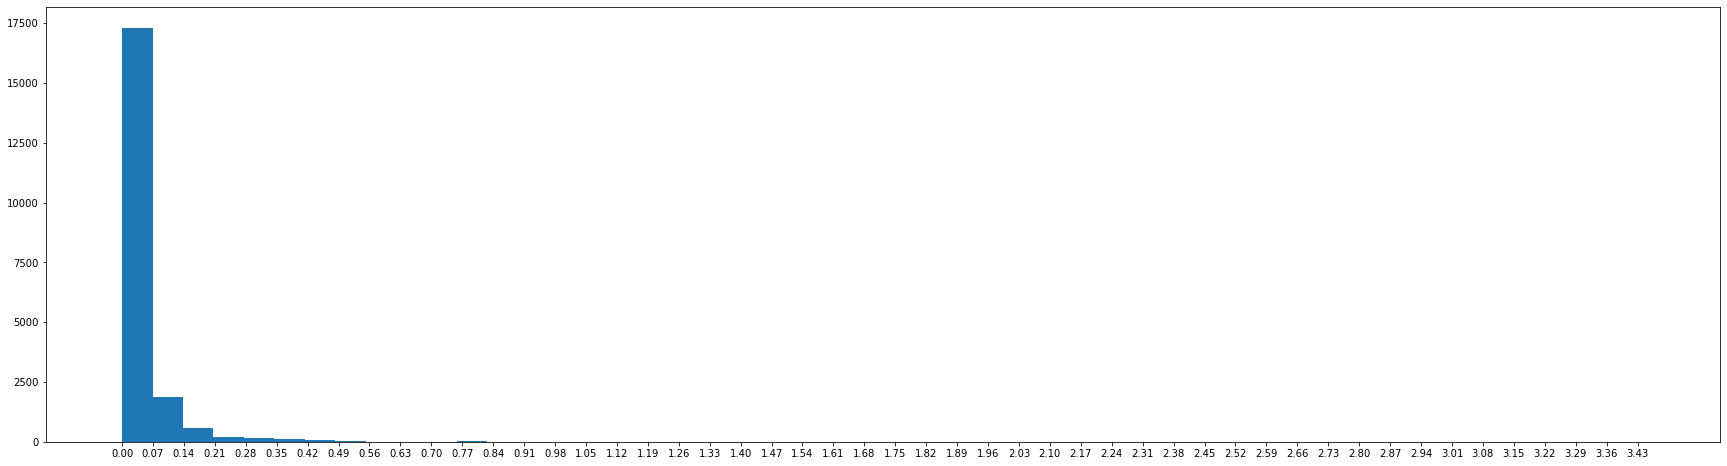

In [167]:
fig=plt.figure(figsize=(30,8))
ax = fig.add_subplot()
ax.hist(avg_rv_per_day,bins=50)
ax.xaxis.set_ticks(np.arange(0,3.5,0.07))
plt.show()

Users who have the the average reviews per day lower than 0.21 is more useful

# Data Exploration

In [191]:
texas_rest_data_copy

,Unnamed: 0,ReviewId,Business ID,user_id,useful,stars,date,review_text,user_review_counts,yelping_since,...,City,State,Postal_code,business_stars,biz_review_counts,structured,price_info,sentiment,avg_rv_pday,spell_score
1,589522,FaOPA8Wg7IL9P9cRPVfg2A,_HjtaT4TMHwOoGG_pZmk1A,IjkcZH5qcb17yn4fCc8pvg,0,5.0,2020-01-02,Torchy's got nothing on this place. First time...,8.0,2013-11-03,...,Austin,TX,78748,4.5,222.0,23,0,positive,0.003027,0.913043
3,589549,cZoQ8fzRaBD3EbICD9osWg,-dNzrtdgR9v5kbqxw0ZKoA,wSaW5syvPtC2yGF0GaGlCw,0,5.0,2020-01-13,"Love this place! Fantastic service, excellent ...",38.0,2009-12-26,...,Austin,TX,78702,4.0,490.0,15,0,positive,0.009380,0.933333
5,589559,bq8qFAEGob28bl9bNtHoRg,KEh3efWSOIzd8BvuW-X4-g,0szBybqEcVuvscXFJObs_w,4,5.0,2020-01-02,"The 04, that's all you need to know. Supper fi...",337.0,2011-08-21,...,Austin,TX,78704,4.5,997.0,78,0,positive,0.097738,0.884615
12,589623,fSN6rrpBSdjfXCkQkU4kkQ,gvpoFnaCq2J7TBXV7yFIkQ,n4Oe41MW3j59PEmrG3HYXw,0,5.0,2020-02-25,I love this place!\nVery tasty tacos...\nClean...,150.0,2017-12-19,...,Austin,TX,78758,4.0,667.0,16,0,positive,0.132042,0.937500
21,589688,XECyroQQXllm9JBAFW8vTg,NTM21on42zdaabHWUSnZ1w,VAWZZoJLhRrl5jxH4t9m_Q,1,2.0,2020-01-11,My boyfriend and I came here off a whim after ...,152.0,2014-06-02,...,Austin,TX,78744,4.0,376.0,43,0,negative,0.062500,0.860465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276934,8634831,h7bK41J-srxtuuVHKJKDHg,RvJzNNcQNimyeBmmOLSSJQ,1O638BDK_fWuxgTVJwff-A,5,2.0,2020-04-26,The taste of this food simply cannot make up b...,2870.0,2008-01-02,...,Austin,TX,78702,4.5,105.0,117,1,negative,0.601047,0.820513
276956,8634919,x2RN8F12NMiU6TOqPsSJqw,WFp2lPcG2JIV8o-r2ilahQ,LaC7BFs_N5UbdxQjjvOjLg,33,2.0,2020-03-02,"Honestly, I was really bummed. We came here a...",267.0,2014-06-28,...,Austin,TX,78753,3.5,38.0,41,0,negative,0.110973,0.902439
276984,8635062,u92pbk9V7t46b60bmUZmJA,la7Zg-LRYE9TPb791akEOg,0PrV9wgHBnDwb71F-ZhMag,1,5.0,2020-02-02,First thing you notice walking in is the cool ...,114.0,2012-08-17,...,Austin,TX,78757,4.0,56.0,72,0,positive,0.036941,0.833333
276999,8635155,HFGKQPcVnm45pH616sS9BQ,O1pWzMvVmBomQUaZ3aUlLw,PKFgiJOXEZfoAhMLYXUqCg,3,2.0,2020-02-24,"Okay, okay. I decided to give Snooze another c...",248.0,2011-04-04,...,Austin,TX,78702,4.0,103.0,166,0,negative,0.069139,0.831325


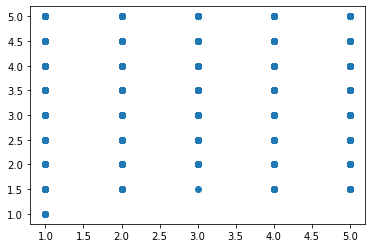

In [327]:
plt.scatter(texas_rest_data_copy['stars'],texas_rest_data_copy['business_stars'])
plt.show()

In [192]:
texas_rest_data_copy.columns

Index(['Unnamed: 0', 'ReviewId', 'Business ID', 'user_id', 'useful', 'stars',
       'date', 'review_text', 'user_review_counts', 'yelping_since',
       'average_stars', 'Name', 'City', 'State', 'Postal_code',
       'business_stars', 'biz_review_counts', 'structured', 'price_info',
       'sentiment', 'avg_rv_pday', 'spell_score'],
      dtype='object')

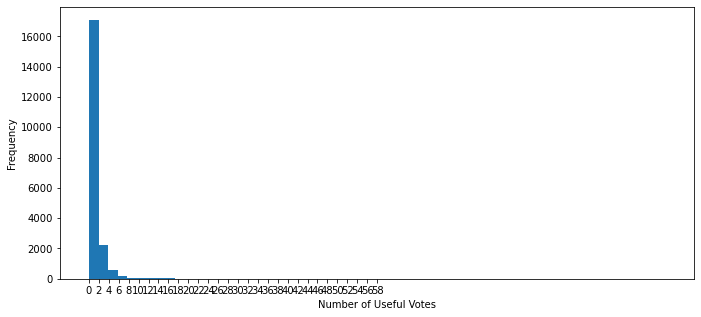

In [544]:
fig = plt.figure(figsize=(25,5))
ax1 = fig.add_subplot(1,2,1)
ax1.hist(texas_rest_data_copy['useful'],bins =60)
ax1.xaxis.set_ticks(np.arange(0,60,2))
plt.xlabel('Number of Useful Votes')
plt.ylabel('Frequency')
ax2.boxplot(texas_rest_data_copy['useful'])
plt.show()


In [223]:
print("Mean of Useful:",texas_rest_data_copy['useful'].mean())
print("median of useful:",texas_rest_data_copy['useful'].median())
print("Min:", texas_rest_data_copy['useful'].min())
print("max:", texas_rest_data_copy['useful'].max())

Mean of Useful: 0.9590946945573899
median of useful: 0.0
Min: 0
max: 116


Reviews with at least two useful votes will be considered as useful review

In [228]:
bools = texas_rest_data_copy['useful'] >= 2

In [229]:
texas_rest_data_copy['useful_label'] = bools

In [230]:
def convert_value(bool_val):
    if bool_val == True:
        return 1
    else:
        return 0

In [232]:
texas_rest_data_copy['useful_label']=texas_rest_data_copy['useful_label'].apply(convert_value)

In [237]:
texas_rest_data_copy.columns

Index(['Unnamed: 0', 'ReviewId', 'Business ID', 'user_id', 'useful', 'stars',
       'date', 'review_text', 'user_review_counts', 'yelping_since',
       'average_stars', 'Name', 'City', 'State', 'Postal_code',
       'business_stars', 'biz_review_counts', 'rv_word_counts', 'price_info',
       'sentiment', 'avg_rv_pday', 'spell_score', 'useful_label'],
      dtype='object')

In [311]:
texas_rest_data_copy.to_csv('texas_restaurant_dataset.csv','w',encoding='utf-8')

In [334]:
def convert_sentiment_value(sentiment):
    if sentiment == 'positive':
        return 1
    else:
        return 0

In [335]:
positive = texas_rest_data_copy['sentiment'].apply(convert_sentiment_value)

In [337]:
texas_rest_data_copy['positive'] = positive

In [330]:
texas_rest_data_copy.loc[texas_rest_data_copy['useful_label']==0,['sentiment']].value_counts()

sentiment
positive     11585
negative      5501
dtype: int64

In [339]:
number_dataset = texas_rest_data_copy.loc[:,['ReviewId', 'useful', 'stars',
       'date', 'review_text',
       'average_stars','business_stars', 'biz_review_counts', 'rv_word_counts', 'price_info',
       'sentiment', 'avg_rv_pday', 'spell_score', 'useful_label','positive']]

In [451]:
features = ['average_stars','stars','business_stars', 'rv_word_counts', 'price_info',
      'avg_rv_pday', 'spell_score','positive','useful_label']

In [452]:
number_dataset = number_dataset[features]

In [455]:
imbalance_dataset = texas_rest_data_copy[features]

# Logistic Regression model

In [453]:
def get_balance_data(train_imbalance_df):
    useful_series = train_imbalance_df.loc[train_imbalance_df['useful_label']==1,['useful_label']]
    not_useful_series = train_imbalance_df.loc[train_imbalance_df['useful_label']==0,['useful_label']]
    num_of_ones = useful_series.value_counts()[1]
    num_of_zero = not_useful_series.value_counts()[0]
    if num_of_ones == num_of_zero:
        balance_df = train_imbalance_df
        
    elif num_of_ones < num_of_zero:
        minority_df = train_imbalance_df.loc[train_imbalance_df['useful_label']==1,:]
        majority_df = train_imbalance_df.loc[train_imbalance_df["useful_label"]==0,:]
        majority_downdsample_df = resample(majority_df,replace =True,n_samples=num_of_ones,random_state=123)
        balance_df = pd.concat([majority_downdsample_df, minority_df])
    else:
        minority_df = train_imbalance_df.loc[train_imbalance_df['useful_label']==0,:]
        majority_df = train_imbalance_df.loc[train_imbalance_df["useful_label"]==1,:]
        majority_downdsample_df = resample(majority_df,replace =True,n_samples=num_of_zero,random_state=123)
        balance_df = pd.concat([majority_downdsample_df, minority_df])
    return balance_df

In [523]:
imbalance_dataset.useful_label.value_counts()

0    17086
1     3327
Name: useful_label, dtype: int64

In [524]:
17086/(17086+3327)

0.8370156272963307

# Train on Balance Dataset

In [521]:
train_df,test_df = train_test_split(imbalance_dataset,test_size=0.30,shuffle=False)
train_balance_df = get_balance_data(train_df)
x_train= train_balance_df.drop('useful_label', axis = 1)
y_train = train_balance_df.useful_label
x_test = test_df.drop('useful_label', axis =1 )
y_test = test_df.useful_label
logit_model_on_bal_data = LogisticRegression(max_iter = 1000).fit(x_train,y_train)
predict_value = logit_model_on_bal_data.predict(x_test)
accuracy = accuracy_score(y_test,predict_value)
print("Accuracy of balance dataset:", accuracy)

Accuracy of balance dataset: 0.7503265839320705


In [513]:
confusion_metrix_bal = pd.DataFrame({'predict_value':predict_value,'actual_value':y_test})
p0_a0 = confusion_metrix_bal.loc[(confusion_metrix_bal['predict_value']==0) & (confusion_metrix_bal['actual_value']==0),:].count()
p1_a1 = confusion_metrix_bal.loc[(confusion_metrix_bal['predict_value']==1) & (confusion_metrix_bal['actual_value']==1),:].count()
p1_a0 = confusion_metrix_bal.loc[(confusion_metrix_bal['predict_value']==1) & (confusion_metrix_bal['actual_value']==0),:].count()
p0_a1 = confusion_metrix_bal.loc[(confusion_metrix_bal['predict_value']==0) & (confusion_metrix_bal['actual_value']==1),:].count()
print("Prediction:0, actual:0",p0_a0[0])
print("Prediction:1, actual:1",p1_a1[0])
print("Prediction:1, actual:0", p1_a0[0])
print('Prediction:0, actual:1',p0_a1[0])
recall = p1_a1/(confusion_metrix_bal.loc[(confusion_metrix_bal['actual_value']==1),:].count())
precision = p1_a1/(confusion_metrix_bal.loc[(confusion_metrix_bal['predict_value']==1) ,:].count())
print('Recall value\(sensivity) for positive prediction:', recall[0])


Prediction:0, actual:0 3947
Prediction:1, actual:1 648
Prediction:1, actual:0 1118
Prediction:0, actual:1 411
Recall value\(sensivity) for positive prediction: 0.6118980169971672


In [454]:
for i in range(8):
    
    #reduce each feature in dataset
    dropped_feature = features[i]
    reduced_feature_df = number_dataset.drop(dropped_feature,axis=1)

    
    #plit dataset into train and test sets
    train_df,test_df = train_test_split(reduced_feature_df,test_size=0.30,shuffle=False)
    
    # create a balance-train dataset
    balance_train_df = get_balance_data(train_df)
    
    x_train = balance_train_df.drop('useful_label', axis = 1)
    y_train = balance_train_df.useful_label
    x_test = test_df.drop('useful_label', axis = 1)
    y_test = test_df.useful_label
    
    #fit data to model
    logit_model = LogisticRegression(max_iter=1000).fit(x_train,y_train)
    
    #Predict value
    predicted_value = logit_model.predict(x_test)
    
    #Evaluation
    accuracy = accuracy_score(y_test,predicted_value)
    
    print("-{drop_fea} logistic model, accuracy: {accuracy}".format(drop_fea=dropped_feature,accuracy = accuracy))

-average_stars logistic model, accuracy: 0.7527759634225996
-stars logistic model, accuracy: 0.753592423252776
-business_stars logistic model, accuracy: 0.7488569562377531
-rv_word_counts logistic model, accuracy: 0.7671456564337035
-price_info logistic model, accuracy: 0.751796211626388
-avg_rv_pday logistic model, accuracy: 0.7046048334421946
-spell_score logistic model, accuracy: 0.7513063357282822
-positive logistic model, accuracy: 0.7522860875244938


# Train on Imbalance dataset


In [465]:
train_df,test_df = train_test_split(number_dataset,test_size=0.30,shuffle=False)
    
    

x_train = train_df.drop('useful_label', axis = 1)
y_train = train_df.useful_label
x_test = test_df.drop('useful_label', axis = 1)
y_test = test_df.useful_label

#fit data to model
logit_model = LogisticRegression(max_iter=1000).fit(x_train,y_train)

#Predict value
predicted_value = logit_model.predict(x_test)

#Evaluation
accuracy = accuracy_score(y_test,predicted_value)

print("accuracy of imbalance dataset: ",accuracy)


accuracy of imbalance dataset:  0.8386675375571522
Predicted value
 0    5855
1     269
dtype: int64
Actual value
 0    5065
1    1059
Name: useful_label, dtype: int64


In [481]:
metrix_df = pd.DataFrame({'Predicted_value':predicted_value,'Actual value':list(y_test)},index = list(range(6124)))

In [483]:
metrix_df

,Predicted_value,Actual value
0,0,0
1,0,0
2,0,0
3,1,1
4,0,0
...,...,...
6119,1,1
6120,0,1
6121,0,0
6122,0,1


In [491]:
p0_a0 = metrix_df[(metrix_df['Predicted_value'] == 0) & (metrix_df["Actual value"] == 0)].value_counts()

In [492]:
p1_a1 = metrix_df[(metrix_df['Predicted_value'] == 1) & (metrix_df["Actual value"] == 1)].value_counts()

In [493]:
p1_a0 = metrix_df[(metrix_df['Predicted_value'] == 1) & (metrix_df["Actual value"] == 0)].value_counts()

In [494]:
p0_a1 = metrix_df[(metrix_df['Predicted_value'] == 0) & (metrix_df["Actual value"] == 1)].value_counts()

In [459]:
train_df,test_df = train_test_split(imbalance_dataset,test_size=0.30,shuffle=False)
    
    

x_train = train_df.drop('useful_label', axis = 1)
y_train = train_df.useful_label
x_test = test_df.drop('useful_label', axis = 1)
y_test = test_df.useful_label

#fit data to model
logit_model = LogisticRegression(max_iter=1000).fit(x_train,y_train)

#Predict value
predicted_value = logit_model.predict(x_test)

#Evaluation
accuracy = accuracy_score(y_test,predicted_value)

print("accuracy of imbalance dataset: ",accuracy)

accuracy of imbalance dataset:  0.8386675375571522


In [495]:
print(p0_a0)
print(p1_a1)
print(p1_a0)
print(p0_a1)

Predicted_value  Actual value
0                0               4966
dtype: int64
Predicted_value  Actual value
1                1               170
dtype: int64
Predicted_value  Actual value
1                0               99
dtype: int64
Predicted_value  Actual value
0                1               889
dtype: int64


In [508]:
170/(metrix_df[(metrix_df["Actual value"] == 1)].count())

Predicted_value    0.160529
Actual value       0.160529
dtype: float64

In [509]:
print('Recall value for true positive value on imbalance dataset: 0.1605')
print('recall value for true negative value on imbalance dataset: 0.9805')

Recall value for true positive value on imbalance dataset: 0.1605
recall value for true negative value on imbalance dataset: 0.9805


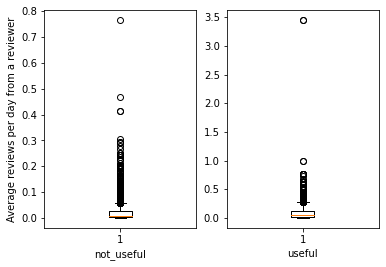

In [647]:
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)
ax1.boxplot(df_downsampled.loc[df_downsampled['useful_label']==0,['avg_rv_pday']])
ax1.set_ylabel('Average reviews per day from a reviewer')
ax1.set_xlabel('not_useful')

ax2.boxplot(df_downsampled.loc[df_downsampled['useful_label']==1,['avg_rv_pday']])
ax2.set_xlabel('useful')
#ax2.yaxis.set_ticks(np.arange(0,0.8,0.1))
plt.show()

In [641]:
df_downsampled.loc[df_downsampled['useful_label']==1,['avg_rv_pday']].mean()

avg_rv_pday    0.098218
dtype: float64

In [644]:
df_downsampled.loc[df_downsampled['useful_label']==1,['avg_rv_pday']].median()

avg_rv_pday    0.052526
dtype: float64

In [643]:
df_downsampled.loc[df_downsampled['useful_label']==0,['avg_rv_pday']].median()

avg_rv_pday    0.009264
dtype: float64

In [642]:
df_downsampled.loc[df_downsampled['useful_label']==0,['avg_rv_pday']].mean()

avg_rv_pday    0.024901
dtype: float64

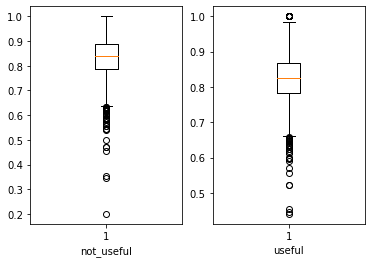

In [326]:
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)
ax1.boxplot(df_downsampled.loc[df_downsampled['useful_label']==0,['spell_score']])
ax1.set_xlabel('not_useful')
ax2.boxplot(df_downsampled.loc[df_downsampled['useful_label']==1,['spell_score']])
ax2.set_xlabel('useful')
plt.show()

# Deep Learning Model

In [393]:
import tensorflow as tf

In [394]:
from keras import layers
from keras import models
from keras import optimizers
from keras import losses
from keras import metrics

In [397]:
model=models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(8,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(x_downsample_train,y_downsample_train,epochs=4,batch_size=512,validation_data=(X_test,y_test))

Epoch 1/4
10/10 [==============================] - 1s 20ms/step - loss: 0.6957 - accuracy: 0.5303 - val_loss: 0.6775 - val_accuracy: 0.6101
Epoch 2/4
10/10 [==============================] - 0s 6ms/step - loss: 0.6625 - accuracy: 0.5975 - val_loss: 0.6798 - val_accuracy: 0.6388
Epoch 3/4
10/10 [==============================] - 0s 5ms/step - loss: 0.6477 - accuracy: 0.6539 - val_loss: 0.7460 - val_accuracy: 0.5893
Epoch 4/4
10/10 [==============================] - 0s 5ms/step - loss: 0.6439 - accuracy: 0.6500 - val_loss: 0.6987 - val_accuracy: 0.6269


In [398]:
print("score on test: " + str(model.evaluate(X_test,y_test)[1]))


192/192 [==============================] - 0s 865us/step - loss: 0.6987 - accuracy: 0.6269
score on test: 0.6268778443336487


In [545]:
balance_dataset = get_balance_data(imbalance_dataset)

In [546]:
balance_dataset

,average_stars,stars,business_stars,rv_word_counts,price_info,avg_rv_pday,spell_score,positive,useful_label
252363,3.25,5.0,4.5,29,0,0.005447,0.862069,1,0
240052,2.85,1.0,3.0,49,0,0.004044,0.775510,0,0
114116,2.00,2.0,4.0,84,0,0.000517,0.845238,0,0
208884,3.93,5.0,3.5,38,0,0.004727,0.710526,1,0
1193,3.82,5.0,5.0,44,0,0.039526,0.909091,1,0
...,...,...,...,...,...,...,...,...,...
276919,2.50,4.0,4.0,47,0,0.001247,0.851064,1,1
276934,3.83,2.0,4.5,117,1,0.601047,0.820513,0,1
276956,4.13,2.0,3.5,41,0,0.110973,0.902439,0,1
276999,3.88,2.0,4.0,166,0,0.069139,0.831325,0,1


In [556]:
X_full = balance_dataset.loc[:,balance_dataset.columns != 'useful_label']

In [549]:
Y_L = balance_dataset.useful_label

In [623]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std

# prepare the cross-validation procedure
cv = KFold(n_splits=30, random_state=1, shuffle=True)

# create model
model = LogisticRegression()

# evaluate model
scores_full_model = cross_val_score(model, X_full, Y_L, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores_full_model), std(scores_full_model)))

Accuracy: 0.712 (0.037)


In [624]:
scores_full_model

array([0.76576577, 0.74774775, 0.77027027, 0.63963964, 0.68468468,
       0.72072072, 0.69369369, 0.72522523, 0.68918919, 0.6981982 ,
       0.66666667, 0.72522523, 0.76576577, 0.69369369, 0.63513514,
       0.63513514, 0.7027027 , 0.69369369, 0.70720721, 0.70720721,
       0.74324324, 0.74324324, 0.75675676, 0.7027027 , 0.67873303,
       0.71493213, 0.71493213, 0.76923077, 0.74208145, 0.71945701])

In [625]:
scores_drop_a_feature = {}

In [626]:
for i in range(8):
    dropped_feature = features[i]
    X_drop = X_full.drop(dropped_feature, axis = 1)
    cv = KFold(n_splits=30, random_state=1, shuffle=True)

    # create model
    model = LogisticRegression()

    # evaluate model
    scores_drop_one_feature = cross_val_score(model, X_drop, Y_L, scoring='accuracy', cv=cv, n_jobs=-1)
    # report performance
    print('Accuracy: %.3f (%.3f)' % (mean(scores_drop_one_feature), std(scores_drop_one_feature)))
    scores_drop_a_feature[dropped_feature] = scores_drop_one_feature

Accuracy: 0.716 (0.031)
Accuracy: 0.713 (0.034)
Accuracy: 0.713 (0.037)
Accuracy: 0.687 (0.037)
Accuracy: 0.715 (0.033)
Accuracy: 0.669 (0.039)
Accuracy: 0.712 (0.036)
Accuracy: 0.714 (0.033)


In [570]:
scores_drop_a_feature

{'average_stars': array([0.75825826, 0.6966967 , 0.7042042 , 0.7042042 , 0.69924812,
        0.69323308, 0.72781955, 0.73383459, 0.6962406 , 0.74285714]),
 'stars': array([0.76426426, 0.69369369, 0.70570571, 0.71171171, 0.69172932,
        0.68721805, 0.73233083, 0.73082707, 0.70075188, 0.73834586]),
 'business_stars': array([0.75525526, 0.68918919, 0.70720721, 0.7027027 , 0.69022556,
        0.68421053, 0.73383459, 0.73383459, 0.6962406 , 0.7443609 ]),
 'rv_word_counts': array([0.71321321, 0.65465465, 0.66816817, 0.67417417, 0.6887218 ,
        0.64360902, 0.70676692, 0.73233083, 0.68571429, 0.68721805]),
 'price_info': array([0.75675676, 0.6966967 , 0.70720721, 0.70570571, 0.69774436,
        0.68421053, 0.73383459, 0.73233083, 0.6962406 , 0.74586466]),
 'avg_rv_pday': array([0.72972973, 0.64864865, 0.64564565, 0.66816817, 0.67067669,
        0.64210526, 0.66015038, 0.69473684, 0.64210526, 0.67819549]),
 'spell_score': array([0.75525526, 0.67717718, 0.7042042 , 0.69219219, 0.69473684

In [611]:
std(scores_full_model)

0.023629216874189198

In [574]:
diff = mean(scores_full_model - scores_drop_a_feature['average_stars'])
print(diff)

-0.003757366388945316


In [627]:
T = list()
folds = 30
N = 100000

In [628]:
p_value_dict = {}

In [633]:
mean(scores_drop_a_feature['spell_score'])

0.7117613088201326

In [629]:
for feature in scores_drop_a_feature:
    T = list()

    for i in range(N):
        num_of_folds = list()

        for i in range(folds):
            num_of_folds.append(random.randint(0, folds-1))
        
    T.append(mean(scores_full_model[num_of_folds] - scores_drop_a_feature[feature][num_of_folds]))
    
    diff = mean(scores_full_model - scores_drop_a_feature[feature])
    T_new = T - mean(T)
    larger_elements = [element for element in T_new if element > diff]
    p_value = len(larger_elements) / N

    p_value_dict[feature] = p_value


In [631]:
p_value_dict

{'average_stars': 1e-05,
 'stars': 1e-05,
 'business_stars': 1e-05,
 'rv_word_counts': 0.0,
 'price_info': 1e-05,
 'avg_rv_pday': 0.0,
 'spell_score': 0.0,
 'positive': 1e-05}

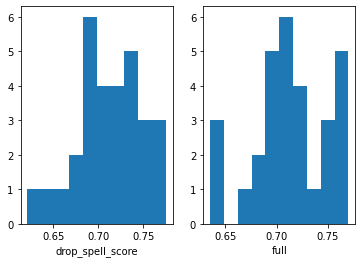

In [636]:
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)
ax1.hist(scores_drop_a_feature['spell_score'])
ax1.set_xlabel('drop_spell_score')

ax2.hist(scores_full_model)
ax2.set_xlabel('full')
plt.show()